<a href="https://colab.research.google.com/github/dennys3mf/tiktok/blob/main/Tik_Tok_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANTE: EJECUTE ESTA CELDA PARA IMPORTAR SUS FUENTES DE DATOS DE KAGGLE
# A LA UBICACIÓN CORRECTA (/kaggle/input) EN SU CUADERNO,
# ENTONCES SIÉNTASE LIBRE DE ELIMINAR ESTA CELDA.
# NOTA: ESTE ENTORNO DE NOTEBOOK DIFIERE DE PYTHON DE KAGGLE
# ENTORNO, POR LO QUE ES POSIBLE QUE FALTEN BIBLIOTECAS UTILIZADAS POR SU
# CUADERNO.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'popular-tiktok-videos-authors-and-musics:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2661440%2F4560360%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240607%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240607T021604Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D830c3da006eb29839af9217acaf607986eab16bc950437eb2020d0a3f594f1efcc18218bafa9412cdc1875ae984352c67a17f508e34de7940ad1d9c07fc8f4f909859ce0487fe2b7eb01d9156adb69151f14fab23240a06d2fe4979fd046e27f68931bbe25f9953f7ea4744d61b8e1f9b8652b8c985aa10ba132a0fcb3a146a3682869a46349f65e172ab2dcaf974a6e35d236cc000b8fa4bafac7f0cb7d03baaec7fbba19f3c06635ebe02d0ded045aef53df101a0ec5a459dafd69b653f0e390f58589bba717e19eb2ac28b261f984225fcf5db0c5da6bed2dc314bead2d26a7940e1d86bb721f5e6999871f033f5617e53f1d8ffa8433f7834a0bf228dba3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 73379 bytes downloaded
Downloaded and uncompressed: popular-tiktok-videos-authors-and-musics
Data source import complete.


In [2]:
# Este entorno de Python 3 viene con muchas bibliotecas de análisis útiles instaladas
# Está definido por la imagen de Docker kaggle/python: https://github.com/kaggle/docker-python
# Por ejemplo, aquí hay varios paquetes útiles para cargar

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Los archivos de datos de entrada están disponibles en el archivo de solo lectura ".. /input/" directorio
# Por ejemplo, al ejecutar esto (haciendo clic en ejecutar o presionando Mayús + Enter) se enumerarán todos los archivos en el directorio de entrada

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Puede escribir hasta 20 GB en el directorio actual (/kaggle/working/) que se conserva como salida cuando crea una versión usando "Guardar y ejecutar todo"
# También puede escribir archivos temporales en /kaggle/temp/, pero no se guardarán fuera de la sesión actual

/kaggle/input/popular-tiktok-videos-authors-and-musics/trending_videos.csv
/kaggle/input/popular-tiktok-videos-authors-and-musics/tiktok_collected_videos.csv
/kaggle/input/popular-tiktok-videos-authors-and-musics/trending_authors.csv
/kaggle/input/popular-tiktok-videos-authors-and-musics/tiktok_funny_hashtag_videos.csv
/kaggle/input/popular-tiktok-videos-authors-and-musics/tiktok_collected_liked_videos.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/popular-tiktok-videos-authors-and-musics/tiktok_collected_liked_videos.csv')
df.columns

Index(['user_name', 'user_id', 'video_id', 'video_desc', 'video_time',
       'video_length', 'video_link', 'n_likes', 'n_shares', 'n_comments',
       'n_plays'],
      dtype='object')

In [5]:
df1 = df [['user_name', 'video_desc', 'video_time',
       'video_length', 'n_likes', 'n_shares', 'n_comments',
       'n_plays']]

In [6]:
df1.head()

,user_name,video_desc,video_time,video_length,n_likes,n_shares,n_comments,n_plays
0,ashleytisdale,We pretty much invented Tiktok. You’re welcome 😂,1629569756,14,289300,2860,3340,1300000
1,imgregorydillon,This couldn’t have been harder 🤣🕯🍩 #birthdayfa...,1629340827,70,143500,3832,1549,574900
2,bswift13,@franksredhot UNBOXING! #hotsaucejourney #team...,1629487766,70,76000,704,1344,355800
3,alejwho,NaN,1629227066,8,1100000,21200,8186,6100000
4,usimmango,Thank y’all💕@billboard // Insta: Usim.mango,1629220590,10,592800,1206,4703,4900000


In [7]:
len(df)

100

Conjunto de datos no muy grande

Encontremos los 5 mejores videos según el número de reproducciones



In [8]:
pop_video_plays = df[['user_name', 'video_desc', 'video_time',
       'video_length', 'n_likes', 'n_shares', 'n_comments',
       'n_plays']].sort_values('n_plays', ascending=False)[:5]
pop_video_plays

,user_name,video_desc,video_time,video_length,n_likes,n_shares,n_comments,n_plays
61,khaby.lame,@tiktok it’s your turn! ⚡️🙋🏿‍♂️ 🙌🏿😂 #tiktoklea...,1621693854,11,23900000,85800,274500,181100000
27,usimmango,Tag who you see🙈 // Insta: Usimmango💕,1623543841,10,21000000,1900000,186700,141700000
12,totouchanemu,I thought I had reached maximum vibes. Then @b...,1628314974,14,16400000,134600,126100,107100000
80,mileycyrus,Sweet niblets 🤡,1618712478,11,16000000,248300,134400,91500000
16,mlb,The purrfect TikTok doesn’t exi- (pt 2),1628034718,11,15100000,326100,136800,67300000


**Encontremos los 5 mejores videos según el número de me gusta**

In [9]:
pop_video_likes = df[['user_name', 'video_desc', 'video_time',
       'video_length', 'n_likes', 'n_shares', 'n_comments',
       'n_plays']].sort_values('n_likes', ascending=False)[:5]
pop_video_likes

,user_name,video_desc,video_time,video_length,n_likes,n_shares,n_comments,n_plays
61,khaby.lame,@tiktok it’s your turn! ⚡️🙋🏿‍♂️ 🙌🏿😂 #tiktoklea...,1621693854,11,23900000,85800,274500,181100000
27,usimmango,Tag who you see🙈 // Insta: Usimmango💕,1623543841,10,21000000,1900000,186700,141700000
12,totouchanemu,I thought I had reached maximum vibes. Then @b...,1628314974,14,16400000,134600,126100,107100000
80,mileycyrus,Sweet niblets 🤡,1618712478,11,16000000,248300,134400,91500000
16,mlb,The purrfect TikTok doesn’t exi- (pt 2),1628034718,11,15100000,326100,136800,67300000


**Vamos a encontrar los 5 mejores vídeos según el número de compartidos**

In [10]:
pop_video_shares = df[['user_name', 'video_desc', 'video_time',
       'video_length', 'n_likes', 'n_shares', 'n_comments',
       'n_plays']].sort_values('n_shares', ascending=False)[:5]
pop_video_shares

,user_name,video_desc,video_time,video_length,n_likes,n_shares,n_comments,n_plays
27,usimmango,Tag who you see🙈 // Insta: Usimmango💕,1623543841,10,21000000,1900000,186700,141700000
67,calebkkraft,STOMPY FLOPPERS! Which is your fav? #petsofti...,1620232944,43,5300000,409900,108600,17800000
91,its_jaiden0,NaN,1614212175,9,3600000,334400,81300,21500000
16,mlb,The purrfect TikTok doesn’t exi- (pt 2),1628034718,11,15100000,326100,136800,67300000
43,avrillavigne,NaN,1624300579,27,6600000,272500,152200,33000000


Otra pregunta que me interesa es si el número de visualizaciones está correlacionado con el número de likes, el número de compartidos y el número de comentarios. Deberíamos pensar que este es el caso, ya que los videos más populares tienden a tener más comentarios. Vamos a averiguarlo.

In [11]:
df[['n_plays', 'n_likes']].corr()

,n_plays,n_likes
n_plays,1.000000,0.969489
n_likes,0.969489,1.000000


In [12]:
df[['n_plays', 'n_shares']].corr()

,n_plays,n_shares
n_plays,1.000000,0.596795
n_shares,0.596795,1.000000


In [13]:
df[['n_plays', 'n_comments']].corr()

,n_plays,n_comments
n_plays,1.000000,0.854319
n_comments,0.854319,1.000000


Como la matriz de correlación muestra una correlación muy fuerte entre el número de reproducciones y el número de likes.

Para el número de jugadas y el número de acciones, el coeficiente de Pearson es ligeramente superior a 0,5. Esto sugiere una correlación de media a fuerte entre las dos cantidades.

donde la matriz de coorelación muestra esa fuerte correlación entre el número de reproducciones y el número de comentarios.

Hagamos una idea de la distribución de la duración de los videos de Tik Tok.****

In [14]:
df['video_length'] = df['video_length']
df['video_length'].describe()

count    100.00000
mean      25.99000
std       21.86344
min        6.00000
25%       13.00000
50%       15.00000
75%       31.50000
max      129.00000
Name: video_length, dtype: float64

Tik Tok, en promedio, dura 25 segundos.

Comprobemos ahora si hay alguna correlación entre la popularidad y la duración de un Tik Tok. ****

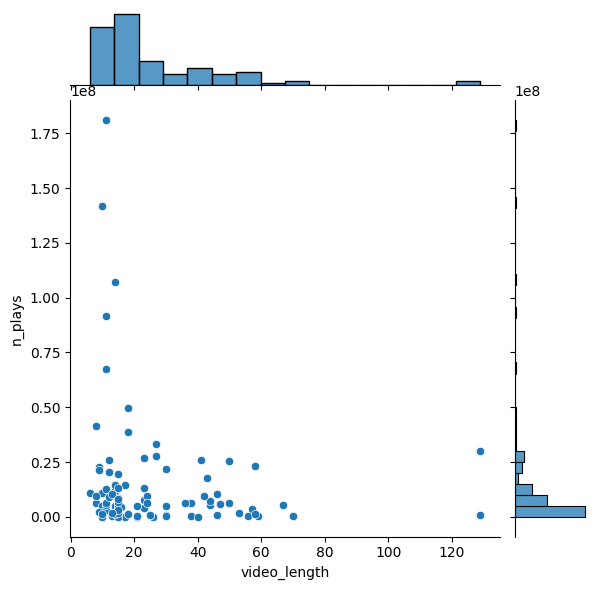

In [15]:
sns.jointplot(x='video_length', y='n_plays', data=df)
plt.xlabel('video_length')
plt.ylabel('n_plays')
plt.show()

Si la duración del video está entre 10 segundos y 25 segundos, existe la posibilidad de que su video obtenga una gran cantidad de reproducciones.